# Reflectiveness classification - Natural Language Processing (NLP)
### Hyosang & Raniya

In [43]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("sentences_all_hand.tsv", sep = "\t")

In [3]:
data.head(5)

,Unnamed: 0,corpus_id,sentence_id,sentence,options,final
0,0.0,0,0.0,Zunächst habe ich meinen Arbeitsplatz vorberei...,"0,2",0
1,1.0,0,1.0,Anschließend las ich das Fallbeispiel mehrmals...,0,0
2,2.0,0,2.0,Ich bin neutral und offen an die Aufgabe heran...,"0,1",1
3,3.0,0,3.0,Nachdem ich zunächst die Aufgabe ohne Lerninha...,"0,2",2
4,4.0,0,4.0,"Die Tipps haben mir sehr geholfen, um meine Lö...",2,2


In [4]:
# Delete unnecessary column
data.drop(data.columns[[0]], axis=1, inplace=True)

In [5]:
data.head(5)

,corpus_id,sentence_id,sentence,options,final
0,0,0.0,Zunächst habe ich meinen Arbeitsplatz vorberei...,"0,2",0
1,0,1.0,Anschließend las ich das Fallbeispiel mehrmals...,0,0
2,0,2.0,Ich bin neutral und offen an die Aufgabe heran...,"0,1",1
3,0,3.0,Nachdem ich zunächst die Aufgabe ohne Lerninha...,"0,2",2
4,0,4.0,"Die Tipps haben mir sehr geholfen, um meine Lö...",2,2


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7620 entries, 0 to 7619
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   corpus_id    7620 non-null   int64  
 1   sentence_id  7619 non-null   float64
 2   sentence     7620 non-null   object 
 3   options      7620 non-null   object 
 4   final        7620 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 297.8+ KB


In [7]:
# Data preprocessing for multi label classification - one hot encoding

data['0'] = [0] * len(data)
data['1'] = [0] * len(data)
data['2'] = [0] * len(data)
data['3'] = [0] * len(data)
data['4'] = [0] * len(data)
data['5'] = [0] * len(data)

for i in range(len(data['options'])): 
    temp = data['options'][i].split(',')
    if '0' in temp: 
        data['0'][i] = 1
    if '1' in temp: 
        data['1'][i] = 1
    if '2' in temp: 
        data['2'][i] = 1
    if '3' in temp: 
        data['3'][i] = 1
    if '4' in temp: 
        data['4'][i] = 1
    if '5' in temp: 
        data['5'][i] = 1
data.head(5)

<ipython-input-7-d26d2a7acca7>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['0'][i] = 1
<ipython-input-7-d26d2a7acca7>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['2'][i] = 1
<ipython-input-7-d26d2a7acca7>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['1'][i] = 1
<ipython-input-7-d26d2a7acca7>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in

,corpus_id,sentence_id,sentence,options,final,0,1,2,3,4,5
0,0,0.0,Zunächst habe ich meinen Arbeitsplatz vorberei...,"0,2",0,1,0,1,0,0,0
1,0,1.0,Anschließend las ich das Fallbeispiel mehrmals...,0,0,1,0,0,0,0,0
2,0,2.0,Ich bin neutral und offen an die Aufgabe heran...,"0,1",1,1,1,0,0,0,0
3,0,3.0,Nachdem ich zunächst die Aufgabe ohne Lerninha...,"0,2",2,1,0,1,0,0,0
4,0,4.0,"Die Tipps haben mir sehr geholfen, um meine Lö...",2,2,0,0,1,0,0,0


In [8]:
multilabel_data = data[['sentence_id', 'sentence', '0', '1', '2', '3', '4', '5']]

In [9]:
# csv file making to use it later to load_dataset function for multi label classification
# multilabel_data.to_csv("sentences_all_hand.csv", index = False)

In [10]:
data.sample(10)

,corpus_id,sentence_id,sentence,options,final,0,1,2,3,4,5
7082,4,86.0,"Sie hat sich nicht verändert, wurde aber um we...",2,2,0,0,1,0,0,0
5687,3,2282.0,"Obwohl ich weiß, dass sich diese Liste im Lauf...",3,3,0,0,0,1,0,0
6505,3,3100.0,Dies würde zu Verärgerung führen und sogar ein...,3,3,0,0,0,1,0,0
5280,3,1875.0,Wenn wir keine Freundschaften schließen und au...,"2,3",3,0,0,1,1,0,0
5273,3,1868.0,Die dreiwöchige Abwesenheit von der Prep Schoo...,"1,4",4,0,1,0,0,1,0
3211,2,259.0,Irgendwo gibt es ein bug den ich nicht finden ...,1,1,0,1,0,0,0,0
2225,1,673.0,Bei dieser Aufgabe habe ich mich weniger in di...,2,2,0,0,1,0,0,0
75,0,75.0,"Auch die Streitschlichtung empfand ich, wie ob...",2,2,0,0,1,0,0,0
371,0,371.0,Anderer Seitz habe ich mir vor der Thematik sc...,2,2,0,0,1,0,0,0
4453,3,1041.0,Mit den vielen Argumenten für und gegen aus de...,"3,4",4,0,0,0,1,1,0


When checking the sample of dataframe, we found some sentence was still in English. Therefore language detection should be worked on. 

Although we tried with 4 to five methods(TextBlob, Googletrans, Polyglot, langdetect), none of them were not able to perfectly detect the language in sentence. That would be the probably the reason why the original datafile still contained english sentence in the first place. Therefore manual data cleansing must be proceeded with the help of one library.

Because there were limited performance shown in TextBlob they were excluded. Polyglot and Googletrans is not based on rule or stats, and langdetect needs comparably larger portion of text for detection hence we chose pycld2. 

In [11]:
# Language detection function in pycld2
import pycld2 as cld2

In [12]:
# Index of non-german sentences stored in a list
nonegerman = []
for i in range(len(data)):
    isReliable, textBytesFound, details = cld2.detect(data['sentence'][i])
    if details[0][0] != "GERMAN": 
        nonegerman.append(i)

In [13]:
len(nonegerman)

240

In [14]:
for i in range(1, len(nonegerman)+1): 
    if i%10 == 0: 
        print(nonegerman[i-10:i], "\n")

[15, 16, 17, 20, 22, 26, 96, 167, 207, 208] 

[209, 212, 255, 296, 351, 378, 384, 391, 419, 456] 

[540, 541, 542, 543, 544, 548, 549, 577, 578, 579] 

[718, 725, 731, 735, 739, 740, 741, 742, 743, 752] 

[790, 791, 844, 896, 909, 912, 927, 928, 931, 994] 

[995, 996, 997, 1025, 1065, 1066, 1067, 1095, 1106, 1107] 

[1263, 1308, 1314, 1315, 1321, 1376, 1484, 1485, 1504, 1568] 

[1580, 1581, 1583, 1584, 1589, 1590, 1627, 1628, 1688, 1695] 

[1697, 1699, 1732, 1740, 1781, 1782, 1898, 1903, 1958, 2042] 

[2185, 2270, 2271, 2282, 2283, 2284, 2288, 2290, 2293, 2298] 

[2300, 2341, 2458, 2459, 2600, 2723, 2726, 2825, 2924, 2925] 

[2980, 3009, 3019, 3025, 3026, 3030, 3031, 3033, 3042, 3043] 

[3044, 3045, 3046, 3049, 3052, 3061, 3065, 3069, 3072, 3081] 

[3091, 3099, 3102, 3103, 3104, 3109, 3111, 3131, 3133, 3134] 

[3157, 3170, 3179, 3185, 3190, 3193, 3197, 3222, 3227, 3284] 

[3325, 3332, 3340, 3375, 3389, 3394, 3458, 3546, 3600, 3642] 

[3695, 3704, 3712, 3884, 3932, 3956, 3957, 3965, 398

Checking the index printed above in the 'sentences_all.tsv' file, only translated English sentence to German using DeepL translator. There were some rows only containing a symbol but we did not handle them to keep the integrity of data which should be used for comparing with another team. 

Then the manually handled file is named 'sentences_all_manual.tsv'. 


## EDA of text data - single target

In [54]:
# Key metrics of data
print("1. Number of samples:", len(data))
print("2. Number of classes:", np.sort(pd.unique(data.final)))
print("3. Number of samples per class:\n")
print(pd.DataFrame(data.final.value_counts()))

cnt_all = [len(data.sentence[i].split()) for i in range(len(data))]
print("\n4. Median of the number of words in a sentence:", np.median(cnt_all))
print("\n5. Max number of words in a sentence:", np.max(cnt_all))

1. Number of samples: 7620
2. Number of classes: [0 1 2 3 4 5]
3. Number of samples per class:

   final
0   3057
2   1933
3   1286
1    517
4    457
5    370

4. Median of the number of words in a sentence: 18.0

5. Max number of words in a sentence: 121


In [16]:
# Data cleaning & preprocessing for removing stopwords. 

import re 
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/gytkd/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Goal of the pre-processing
We needed to remove the stopwords as classifying the meaning of the sentences into some categories.

Also, lemmatization of german should have been differ from the one of english. nltk does not provide the german lemmatizing tools, which has been developed from Standford uni for english.

Therefore we used the Hannover Tagger



###  Stemming and Lemmatization application
- Lemmatization can act as redundant process in this task, since getting tags is not essential as we are not selecting words with language type e.g. nouns, adjectives, adverbs..
- Doing stemming and lemmatization decision can be intuitively adjusted by researchers.
- If about to apply both processes, then lemmatization -> stemming would be appropriate order in another project.
- Therefore we tried 3 combinations of dataset 

    1) Stemmed dataset 
    2) Lemmatized dataset
    3) Lemmatized and then stemmed dataset


In [17]:
# Construct corpus with token unit sentence
# Non-german alphabets containing words are removed.
# Stemming library and list.

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('wordnet')

ps = PorterStemmer()
corpus = []

for i in range(0, len(data)):
    review = re.sub('[^a-zA-ZäöüÄÖÜß]', ' ', data['sentence'][i])
    review = review.lower()
    review = review.split()
    
    review = [word for word in review if not word in stopwords.words('german')]
    review = ' '.join(review)
    corpus.append(review)
corpus[:10]

[nltk_data] Downloading package wordnet to /Users/gytkd/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['zunächst arbeitsplatz vorbereitet konzentriert aufgabe bearbeiten',
 'anschließend las fallbeispiel mehrmals fing spontan fragen beantworten',
 'neutral offen aufgabe herangegangen recht wohl gefühlt',
 'nachdem zunächst aufgabe lerninhalte bearbeitet las tipps konnte mehr reproduktion hinzufügen lösung struktur geben hintergrundwissen basierte',
 'tipps geholfen lösung verbessern',
 'zufrieden leistung',
 'allerdings bewusst vollständig',
 'leider weiß fehlt bzw verbessert',
 'schließlich gute übung perfekt',
 'motiviert finde klassengeschehen klassendynamik gutes effektives lernen wichtig']

In [18]:
# Stemmed corpus
stem_corpus = [ps.stem(word) for word in corpus]
stem_corpus[:10]

['zunächst arbeitsplatz vorbereitet konzentriert aufgabe bearbeiten',
 'anschließend las fallbeispiel mehrmals fing spontan fragen beantworten',
 'neutral offen aufgabe herangegangen recht wohl gefühlt',
 'nachdem zunächst aufgabe lerninhalte bearbeitet las tipps konnte mehr reproduktion hinzufügen lösung struktur geben hintergrundwissen basiert',
 'tipps geholfen lösung verbessern',
 'zufrieden leistung',
 'allerdings bewusst vollständig',
 'leider weiß fehlt bzw verbessert',
 'schließlich gute übung perfekt',
 'motiviert finde klassengeschehen klassendynamik gutes effektives lernen wichtig']

In [19]:
# Lemmatizing corpus
# sentences_tok  =  [nltk.tokenize.word_tokenize ( sent )  for  sent  in  corpus
# For german lemmatization, NLTK cannot be used so that we used the HanoverTagger.

from HanTa import HanoverTagger as ht

lem_corpus  =  []
temp = ''
tagger = ht.HanoverTagger('morphmodel_ger.pgz')

for raw in corpus:
    tok_raw = [nltk.tokenize.word_tokenize( raw )]
    lem_tok = []
    for tok in tok_raw:
        tags = tagger.tag_sent(tok)
        lem_tok.extend(lemma for (word, lemma, pos) in tags)
    temp = " ".join(lem_tok)
    lem_corpus.append(temp)

lem_corpus[:10]

['zunächst Arbeitsplatz vorbereiten konzentriert Aufgabe bearbeiten',
 'anschließend lesen Fallbeispiel mehrmals fangen spontan fragen beantworten',
 'neutral offen Aufgabe herangehen recht wohl fühlen',
 'nachdem zunächst Aufgabe Lerninhalte bearbeiten Las Tipps können mehr Reproduktion hinfügen Lösung Struktur geben hintergrundwissen basieren',
 'Tipps helfen Lösung verbessern',
 'zufrieden Leistung',
 'allerdings bewissen vollständig',
 'leider weiß fehlen Bzw verbessern',
 'schließlich gut Übung perfekt',
 'motivieren finden klassengeschehen klassendynamik gut effektiv lernen wichtig']

In [20]:
# Lemmatized and stemmed corpus 
lem_stem_corpus = [ps.stem(word) for word in lem_corpus]
lem_stem_corpus[:10]

['zunächst arbeitsplatz vorbereiten konzentriert aufgabe bearbeiten',
 'anschließend lesen fallbeispiel mehrmals fangen spontan fragen beantworten',
 'neutral offen aufgabe herangehen recht wohl fühlen',
 'nachdem zunächst aufgabe lerninhalte bearbeiten las tipps können mehr reproduktion hinfügen lösung struktur geben hintergrundwissen basieren',
 'tipps helfen lösung verbessern',
 'zufrieden leistung',
 'allerdings bewissen vollständig',
 'leider weiß fehlen bzw verbessern',
 'schließlich gut übung perfekt',
 'motivieren finden klassengeschehen klassendynamik gut effektiv lernen wichtig']

### Summary of dataset
corpus

1. non-german alphabets are removed e.g. '.' or '!'
2. lowercase
3. stopwords are removed

lem_corpus: lemmatized corpus

stem_corpus: stemmed corpus

[('gut', 948),
 ('Kind', 846),
 ('Aufgabe', 834),
 ('Thema', 527),
 ('lernen', 471),
 ('Bearbeitung', 412),
 ('geben', 402),
 ('werden', 402),
 ('Lehrer', 376),
 ('wichtig', 368)]


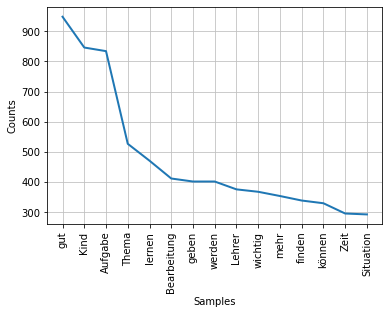

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [21]:
# Check the most common words in graph
# Plus, we can see the useful feature of the lemmatization - tag. 
#      If we were looking for nouns only, then we can give the condition after the for (word, lemma, pos)
# In a variable sentences_tok: Each sentence will be one list containing words.

from pprint import pprint
common  =  []  
sentences_tok  =  [nltk.tokenize.word_tokenize ( sent )  for  sent  in  corpus] 

for  sent  in  sentences_tok : 
    tags  =  tagger.tag_sent(sent)  
    comm_from_sent  =  [ lemma  for  ( word , lemma , pos )  in  tags] 
    common.extend(comm_from_sent)

fdist  =  nltk.FreqDist (common)    

# Most common 10 words
pprint (fdist.most_common ( 10 )) 
# Graph most common 15 words
fdist.plot (15 , cumulative = False )

In [22]:
# Visualization library
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk import ngrams
from collections import Counter

# A sample length - Number of samples without spaces in between
def plot_sample_length_distribution(sample_texts):
    """Plots the sample length distribution.

    # Arguments
        samples_texts: list, sample texts.
    """
    plt.hist([len(s.split()) for s in sample_texts], 50)
    plt.xlabel('Length of a sample')
    plt.ylabel('Number of samples')
    plt.title('Sample length distribution')
    plt.show()

In [23]:
# Word frequency for unigram, bigram, and trigram.
def word_frequency(new_tokens):
    counted = Counter(new_tokens)
    counted_2 = Counter(ngrams(new_tokens, 2))
    counted_3 = Counter(ngrams(new_tokens, 3))
    
    word_freq = pd.DataFrame(counted.items(), columns = ['word', 'frequency']).sort_values(by = ['frequency'], ascending = False)
    word_pairs = pd.DataFrame(counted_2.items(), columns = ['pairs', 'frequency']).sort_values(by = ['frequency'], ascending = False)
    trigrams = pd.DataFrame(counted_3.items(), columns = ['trigrams', 'frequency']).sort_values(by = ['frequency'], ascending = False)
    return word_freq, word_pairs, trigrams

data2, data3, data4 = word_frequency(common)

In [24]:
# Add another column of word_len in dataframe of unigram 
data2['word_len'] = [len(w) for w in data2['word']]
data2 = data2.reset_index(drop = True)

In [25]:
# Words lemmatized ordered in frequency with word_len information together
data2

,word,frequency,word_len
0,gut,948,3
1,Kind,846,4
2,Aufgabe,834,7
3,Thema,527,5
4,lernen,471,6
...,...,...,...
9203,Lucky,1,5
9204,Fotograf,1,8
9205,teamleit,1,8
9206,chefkoch,1,8


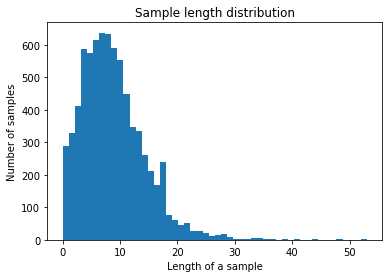

In [26]:
# Visualization 
# Length of a sample and Number of samples - how many words in each sentence

plot_sample_length_distribution(corpus)

Most of the sentences consist of 0-30 words.

In [27]:
# Max, Min, Average length of the sentence
data['len']= data['sentence'].str.split().map(lambda x: len(x))
print('Max length: {}, Min length: {}, Average Length :  {}'.format(max(data['len']),min(data['len']),data['len'].mean()))

Max length: 121, Min length: 1, Average Length :  19.090288713910763


## N-grams
N-grams is the continuous sequence of words or symbols in a document.

If N == 1: unigram, N == 2: bigram, N == 3: trigram

<AxesSubplot:xlabel='frequency', ylabel='trigrams'>

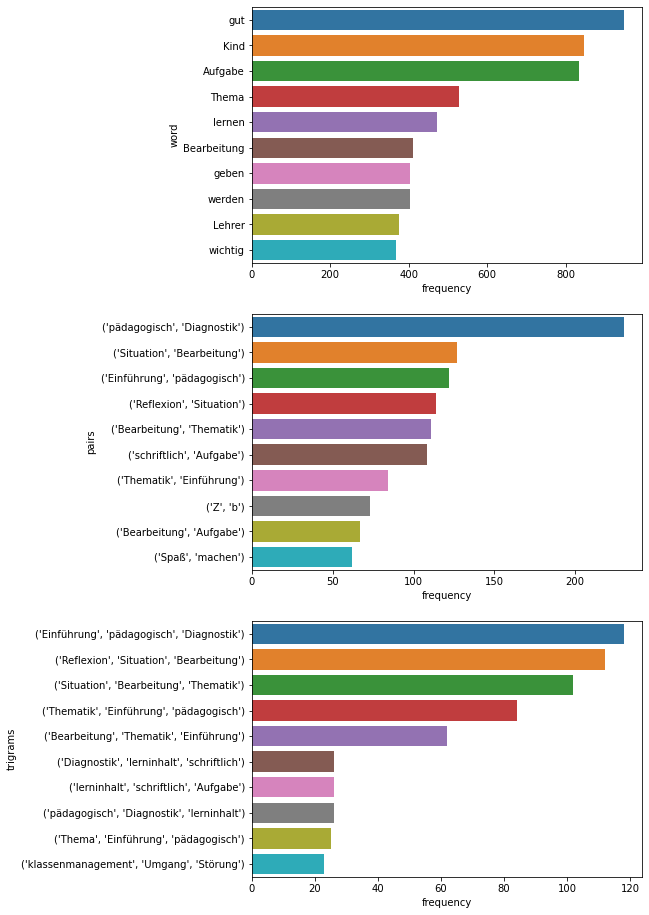

In [36]:
# Word frequency
fig, axes = plt.subplots(3,1,figsize=(7,16))

sns.barplot(ax=axes[0],x='frequency',y='word',data= data2.head(10))
sns.barplot(ax=axes[1],x='frequency',y='pairs',data=data3.head(10))
sns.barplot(ax=axes[2],x='frequency',y='trigrams',data=data4.head(10))



# Machine learning

In [29]:
from sklearn import naive_bayes, svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score

## Preprocessing - Bag of Words

As we are not using multiple documents rather all are combined in one document, TF/IDF does not have a power to impact a lot on the result. Therefore we chose BoW. 

In [30]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)

# By changing the dataset from 1)stem_corpus, 2)lem_corpus, 3)lem_stem_corpus 
#    Different accuracy results are below.

X = cv.fit_transform(lem_stem_corpus).toarray()
y = data['final']

In [31]:
# Train-test set split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [39]:
# For the classification report 
from sklearn.metrics import classification_report
label_names = ['0', '1', '2', '3', '4', '5']

## SVM

It is known to be well performing in text classification

In [40]:
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(X_train,y_train)

# predict the labels on validation dataset
prediction_SVM = SVM.predict(X_test)

print(classification_report(y_test, prediction_SVM,target_names=label_names))
print("SVM Cohen's Kappa -> ", cohen_kappa_score(y_test, prediction_SVM))

              precision    recall  f1-score   support

           0       0.57      0.74      0.64       568
           1       0.34      0.33      0.33       100
           2       0.51      0.48      0.49       404
           3       0.40      0.28      0.33       270
           4       0.23      0.16      0.19        96
           5       0.39      0.22      0.28        86

    accuracy                           0.50      1524
   macro avg       0.41      0.37      0.38      1524
weighted avg       0.48      0.50      0.48      1524

SVM Cohen's Kappa ->  0.30240852119257544


## Naive Bayes Classifier 

It goes well with multinomial variant. 

In [41]:
Naive = naive_bayes.MultinomialNB()
Naive.fit(X_train,y_train)

# predict the labels on validation dataset
prediction_NB = Naive.predict(X_test)

print(classification_report(y_test, prediction_NB,target_names=label_names))
print("Naive Bayes Cohen's Kappa -> ", cohen_kappa_score(y_test, prediction_NB))

              precision    recall  f1-score   support

           0       0.57      0.67      0.62       568
           1       0.37      0.14      0.20       100
           2       0.44      0.60      0.51       404
           3       0.36      0.25      0.30       270
           4       0.29      0.07      0.12        96
           5       0.42      0.27      0.33        86

    accuracy                           0.48      1524
   macro avg       0.41      0.33      0.34      1524
weighted avg       0.46      0.48      0.46      1524

Naive Bayes Cohen's Kappa ->  0.27482598859439256


## Random Forest

In [42]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
prediction_RF = rf.predict(X_test)

print(classification_report(y_test, prediction_RF,target_names=label_names))
print("Random Forest Cohen's Kappa -> ", cohen_kappa_score(y_test, prediction_RF))

              precision    recall  f1-score   support

           0       0.51      0.82      0.63       568
           1       0.29      0.33      0.31       100
           2       0.45      0.46      0.46       404
           3       0.52      0.10      0.16       270
           4       0.31      0.04      0.07        96
           5       0.38      0.12      0.18        86

    accuracy                           0.47      1524
   macro avg       0.41      0.31      0.30      1524
weighted avg       0.46      0.47      0.42      1524

Random Forest Cohen's Kappa ->  0.24099626660837659


### F1 Score by different dataset

F1 score = 2{(precision * recall)/ (precision + recall)}

[Lemmatization -> stemming]

* svm = [0.64171123 0.33333333 0.49492386 0.32751092 0.1875     0.28148148]
* nb = [0.61676159 0.20289855 0.5057232  0.2962963  0.11666667 0.32624113]
* rf = [0.62176871 0.30841121 0.44389642 0.16969697 0.03669725 0.21052632]

    
[stemmed]
    
* svm = [0.64626866 0.30150754 0.4507772  0.3580786  0.22516556 0.3125    ]
* nb = [0.61676159 0.20289855 0.5057232  0.2962963  0.11666667 0.32624113]
* rf = [0.61964039 0.34418605 0.46078431 0.1497006  0.05172414 0.34710744]


[Lemmatized]
    
* svm = [0.64427481 0.33502538 0.48621554 0.329718   0.14473684 0.26153846]
* nb = [0.61676159 0.20289855 0.5057232  0.2962963  0.11666667 0.32624113]
* rf = [0.64337508 0.30046948 0.44730077 0.16969697 0.07272727 0.18      ]

### Cohen's Kappa by different dataset

rater1: Real observation 
rater2: Model prediction
(rater1, rater2 can be switched as well)

Po = Agreement between rater 1, rater 2: TP and TN

pe = Agreement between rater 1 and rater 2 by chance: (Rater1 positive * Rater2 positive) + (Rater1 negative * Rater2 negative) 


<Kappa: Agreement>

<0: Less than chance agreement

0.01 - 0.20: Slight agreement

0.21 - 0.40: Fair agreement

0.41 - 0.60: Moderate agreement

0.61 - 0.80: Substantial agreement 

0.81 - 0.99: Almost perfect agreement



[Lemmatization -> stemming]

* svm = 0.302408
* nb = 0.274825
* rf = 0.233542

    
[stemmed]
    
* svm = 0.297399
* nb = 0.309497
* rf = 0.247251


[Lemmatized]
    
* svm = 0.297042
* nb = 0.276526
* rf = 0.249603

There was no big difference depending on the application of lemmatization and stemming to the dataset, therefore we chose to present the stemmed corpus

### Train & Test - group assigned train - test set

In [46]:
# Using group train - test set
train_data= pd.read_csv("sentences_train.tsv", sep = "\t")

train_data.head(5)

# Delete unnecessary column
train_data.drop(train_data.columns[[0]], axis=1, inplace=True)

train_data.head(5)


,corpus_id,sentence_id,sentence,options,final
0,0,800,"Ja, ich war konzentriert wenn ich immer mal wi...","0,2",2
1,3,319,"Ich bin der festen Überzeugung, dass sich dies...",3,3
2,3,2177,"Das erste, was ich tat, war, Year 3 Lesern ein...",0,0
3,4,0,Über die WEKA-Übung:,0,0
4,0,1552,"Nichtsdestotrotz finde ich es gut, dass diese ...","0,2",2


In [45]:
# Using group train - test set
test_data= pd.read_csv("sentences_test.tsv", sep = "\t")

test_data.head(5)

# Delete unnecessary column
test_data.drop(test_data.columns[[0]], axis=1, inplace=True)

test_data.head(5)

,corpus_id,sentence_id,sentence,options,final
0,0,542,die,0,0
1,1,1178,Was hat mir während der Bearbeitung besonders ...,0,0
2,1,902,"Trotzdem ist anzumerken, dass eine Fülle an ge...",2,2
3,0,1460,Ich verstand erst nach Öfteren durchlesen der ...,2,2
4,3,2359,Obwohl mein Tag mit einer Geschichtsstunde beg...,"0,1",1


In [50]:
# Text cleaning for train_data and test_data

ps = PorterStemmer()
corpus_train = []
corpus_test = []

# Text cleaning
for i in range(0, len(train_data)):
    review = re.sub('[^a-zA-ZäöüÄÖÜß]', ' ', train_data['sentence'][i])
    review = review.lower()
    review = review.split()
    
    review = [word for word in review if not word in stopwords.words('german')]
    review = ' '.join(review)
    corpus_train.append(review)

for i in range(0, len(test_data)):
    review = re.sub('[^a-zA-ZäöüÄÖÜß]', ' ', test_data['sentence'][i])
    review = review.lower()
    review = review.split()
    
    review = [word for word in review if not word in stopwords.words('german')]
    review = ' '.join(review)
    corpus_test.append(review)
    
# Stemmed corpus
stem_corpus_train = [ps.stem(word) for word in corpus_train]
stem_corpus_test = [ps.stem(word) for word in corpus_test]

# Bag of Words

X_train = cv.fit_transform(stem_corpus_train).toarray()
y_train = train_data['final']

X_test = cv.fit_transform(stem_corpus_test).toarray()
y_test = test_data['final']

## SVM

It is known to be well performing in text classification

In [51]:
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(X_train,y_train)

# predict the labels on validation dataset
prediction_SVM = SVM.predict(X_test)

print(classification_report(y_test, prediction_SVM,target_names=label_names))
print("SVM Cohen's Kappa -> ", cohen_kappa_score(y_test, prediction_SVM))

              precision    recall  f1-score   support

           0       0.43      0.68      0.53       604
           1       0.04      0.05      0.05       107
           2       0.26      0.20      0.22       360
           3       0.25      0.10      0.14       278
           4       0.05      0.01      0.02       100
           5       0.10      0.05      0.07        75

    accuracy                           0.34      1524
   macro avg       0.19      0.18      0.17      1524
weighted avg       0.29      0.34      0.29      1524

SVM Cohen's Kappa ->  0.040062034451455064


## Naive Bayes Classifier 

It goes well with multinomial variant. 

In [52]:
Naive = naive_bayes.MultinomialNB()
Naive.fit(X_train,y_train)

# predict the labels on validation dataset
prediction_NB = Naive.predict(X_test)

print(classification_report(y_test, prediction_NB,target_names=label_names))
print("Naive Bayes Cohen's Kappa -> ", cohen_kappa_score(y_test, prediction_NB))

              precision    recall  f1-score   support

           0       0.45      0.43      0.44       604
           1       0.07      0.15      0.09       107
           2       0.28      0.16      0.20       360
           3       0.18      0.12      0.14       278
           4       0.08      0.08      0.08       100
           5       0.05      0.15      0.08        75

    accuracy                           0.25      1524
   macro avg       0.18      0.18      0.17      1524
weighted avg       0.29      0.25      0.26      1524

Naive Bayes Cohen's Kappa ->  0.03364843104699755


## Random Forest

In [53]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
prediction_RF = rf.predict(X_test)

print(classification_report(y_test, prediction_RF,target_names=label_names))
print("Random Forest Cohen's Kappa -> ", cohen_kappa_score(y_test, prediction_RF))

              precision    recall  f1-score   support

           0       0.44      0.64      0.52       604
           1       0.05      0.06      0.05       107
           2       0.23      0.26      0.25       360
           3       0.29      0.07      0.12       278
           4       0.08      0.02      0.03       100
           5       0.06      0.03      0.04        75

    accuracy                           0.34      1524
   macro avg       0.19      0.18      0.17      1524
weighted avg       0.30      0.34      0.29      1524

Random Forest Cohen's Kappa ->  0.04270584343156292
